# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['saldanha',
 'toliary',
 'taolanaro',
 'port macquarie',
 'hobyo',
 'dikson',
 'ponta do sol',
 'plettenberg bay',
 'buluang',
 'general roca',
 'springfield',
 'minab',
 'bluff',
 'ribeira grande',
 'rikitea',
 'khani',
 'yellowknife',
 'punta arenas',
 'ushuaia',
 'port elizabeth',
 'alofi',
 'belushya guba',
 'katsuura',
 'broken hill',
 'jamestown',
 'roma',
 'wanning',
 'mar del plata',
 'nizhneyansk',
 'bang saphan',
 'puerto ayora',
 'grand gaube',
 'aksarka',
 'zaltan',
 'hamilton',
 'bengkulu',
 'grand river south east',
 'albany',
 'ancud',
 'lokosovo',
 'busselton',
 'chokurdakh',
 'mankera',
 'paro',
 'tuktoyaktuk',
 'faanui',
 'cape town',
 'hokitika',
 'iqaluit',
 'atuona',
 'kaitangata',
 'butaritari',
 'juegang',
 'east london',
 'upernavik',
 'waitakere',
 'meadow lake',
 'turan',
 'cocorit',
 'vidim',
 'vardo',
 'iskateley',
 'hofn',
 'asau',
 'lorengau',
 'paamiut',
 'norman wells',
 'vaini',
 'yulara',
 'bayan',
 'kapaa',
 'umea',
 'avarua',
 'port augusta',
 'beth

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Build partial url to fetch weather information for cities in the list
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
citylist = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
dte = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print("Beginning Data Retrieval")
for city in cities:
    try:
   
        response = requests.get(query_url + city).json()
        print("Processing data for " + city + " :")
        print(json.dumps(response, indent=4, sort_keys=True))
        print("latitude: "+ str(response['coord']['lat']))
        print("longitude : " + str(response['coord']['lon'] ))
        print("maxtemp : " + str(response['main']['temp_max']))
        print("humidity : " + str(response['main']['humidity']))
        print("cloudiness : " + str(response['clouds']['all']))
        print("windspeed : " + str(response['wind']['speed']))
        print("country : "+ str(response['sys']['country']))
        print("date : "+ str(response['dt']))
        citylist.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dte.append(response['dt'])
    except:
        print(city + "not found")
        maxlength = len(citylist)
        if maxlength > 0:
            if(len(lat)) == maxlength:
                lat.pop()
            if(len(lng)) == maxlength :
                lng.pop()
            if(len(maxtemp)) == maxlength:
                maxtemp.pop()
            if(len(humidity)) == maxlength:
                humidity.pop()
            if(len(cloudiness)) == maxlength:
                cloudiness.pop()
            if(len(windspeed)) == maxlength:
                windspeed.pop()
            if(len(country)) == maxlength:
                country.pop()
            if(len(dte)) == maxlength:
                dte.pop()
            citylist.pop()
        
print(lat)
print(lng)
print(maxtemp)
print(humidity)
print(cloudiness)
print(windspeed)
print(country)
print(dte)
        
 




Beginning Data Retrieval
Processing data for saldanha :
{
    "base": "stations",
    "clouds": {
        "all": 16
    },
    "cod": 200,
    "coord": {
        "lat": -33.01,
        "lon": 17.94
    },
    "dt": 1603669884,
    "id": 3361934,
    "main": {
        "feels_like": 53.87,
        "humidity": 82,
        "pressure": 1016,
        "temp": 57.2,
        "temp_max": 57.2,
        "temp_min": 57.2
    },
    "name": "Saldanha",
    "sys": {
        "country": "ZA",
        "id": 1943,
        "sunrise": 1603684476,
        "sunset": 1603732170,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 6.93
    }
}
latitude: -33.01
longitude : 17.94
maxtemp : 57.2
humidity : 82
cloudiness : 16
windspeed : 6.93
country : ZA
date : 1603669884
Processing

Processing data for minab :
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 27.15,
        "lon": 57.08
    },
    "dt": 1603669885,
    "id": 123941,
    "main": {
        "feels_like": 62.58,
        "humidity": 35,
        "pressure": 1013,
        "temp": 69.8,
        "temp_max": 69.8,
        "temp_min": 69.8
    },
    "name": "M\u012bn\u0101b",
    "sys": {
        "country": "IR",
        "id": 7477,
        "sunrise": 1603678671,
        "sunset": 1603719189,
        "type": 1
    },
    "timezone": 12600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 9.17
    }
}
latitude: 27.15
longitude : 57.08
maxtemp : 69.8
humidity : 35
cloudiness : 0
windspeed : 9.17
country : IR
date : 1603669885
Processing data for bluff :
{
    "ba

Processing data for belushya guba :
{
    "cod": "404",
    "message": "city not found"
}
belushya gubanot found
Processing data for katsuura :
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 35.13,
        "lon": 140.3
    },
    "dt": 1603669324,
    "id": 2112309,
    "main": {
        "feels_like": 56.44,
        "humidity": 62,
        "pressure": 1017,
        "temp": 60.85,
        "temp_max": 63,
        "temp_min": 59
    },
    "name": "Katsuura",
    "sys": {
        "country": "JP",
        "id": 8074,
        "sunrise": 1603659253,
        "sunset": 1603698664,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 6.93
    }
}
latitude: 35.13
longitude : 140.3
maxtemp : 63
hum

Processing data for aksarka :
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 66.56,
        "lon": 67.8
    },
    "dt": 1603669887,
    "id": 1512019,
    "main": {
        "feels_like": 0.3,
        "grnd_level": 1014,
        "humidity": 96,
        "pressure": 1018,
        "sea_level": 1018,
        "temp": 12.61,
        "temp_max": 12.61,
        "temp_min": 12.61
    },
    "name": "Aksarka",
    "sys": {
        "country": "RU",
        "sunrise": 1603681568,
        "sunset": 1603711146
    },
    "timezone": 18000,
    "visibility": 2877,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 48,
        "speed": 11.81
    }
}
latitude: 66.56
longitude : 67.8
maxtemp : 12.61
humidity : 96
cloudiness : 100
windspeed : 11.81
country : RU
date : 1603669887
Processing data

Processing data for tuktoyaktuk :
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 69.45,
        "lon": -133.04
    },
    "dt": 1603669888,
    "id": 6170031,
    "main": {
        "feels_like": 3.85,
        "humidity": 92,
        "pressure": 1021,
        "temp": 19.4,
        "temp_max": 19.4,
        "temp_min": 19.4
    },
    "name": "Tuktoyaktuk",
    "sys": {
        "country": "CA",
        "id": 942,
        "sunrise": 1603644459,
        "sunset": 1603671864,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13d",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 330,
        "gust": 24.16,
        "speed": 18.34
    }
}
latitude: 69.45
longitude : -133.04
maxtemp : 19.4
humidity : 92
cloudiness : 90
windspeed : 18.34
country : CA
date : 1603669888
Proc

Processing data for upernavik :
{
    "base": "stations",
    "clouds": {
        "all": 65
    },
    "cod": 200,
    "coord": {
        "lat": 72.79,
        "lon": -56.15
    },
    "dt": 1603669889,
    "id": 3418910,
    "main": {
        "feels_like": 5.25,
        "grnd_level": 1001,
        "humidity": 76,
        "pressure": 1001,
        "sea_level": 1001,
        "temp": 13.91,
        "temp_max": 13.91,
        "temp_min": 13.91
    },
    "name": "Upernavik",
    "sys": {
        "country": "GL",
        "sunrise": 1603627915,
        "sunset": 1603651503
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 99,
        "speed": 4.88
    }
}
latitude: 72.79
longitude : -56.15
maxtemp : 13.91
humidity : 76
cloudiness : 65
windspeed : 4.88
country : GL
date : 1603669889
Processing

Processing data for asau :
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 46.43,
        "lon": 26.4
    },
    "dt": 1603669890,
    "id": 686090,
    "main": {
        "feels_like": 52.54,
        "humidity": 98,
        "pressure": 1014,
        "temp": 53.01,
        "temp_max": 53.01,
        "temp_min": 53.01
    },
    "name": "As\u0103u",
    "rain": {
        "1h": 0.18
    },
    "sys": {
        "country": "RO",
        "id": 2033571,
        "sunrise": 1603687642,
        "sunset": 1603724943,
        "type": 3
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 32,
        "speed": 2.19
    }
}
latitude: 46.43
longitude : 26.4
maxtemp : 53.01
humidity : 98
cloudiness : 100
windspeed : 2.19
country : RO
date : 16036698

Processing data for port augusta :
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -32.5,
        "lon": 137.77
    },
    "dt": 1603669891,
    "id": 2063056,
    "main": {
        "feels_like": 43.99,
        "humidity": 43,
        "pressure": 1022,
        "temp": 52.88,
        "temp_max": 55.4,
        "temp_min": 52
    },
    "name": "Port Augusta",
    "sys": {
        "country": "AU",
        "id": 9613,
        "sunrise": 1603655778,
        "sunset": 1603703353,
        "type": 1
    },
    "timezone": 37800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 9.17
    }
}
latitude: -32.5
longitude : 137.77
maxtemp : 55.4
humidity : 43
cloudiness : 90
windspeed : 9.17
country : AU
date : 1603669891
Processing data for be

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
citylist

['port macquarie',
 'hobyo',
 'dikson',
 'ponta do sol',
 'plettenberg bay',
 'buluang',
 'general roca',
 'springfield',
 'minab',
 'bluff',
 'ribeira grande',
 'rikitea',
 'khani',
 'yellowknife',
 'punta arenas',
 'ushuaia',
 'port elizabeth',
 'katsuura',
 'broken hill',
 'jamestown',
 'roma',
 'wanning',
 'bang saphan',
 'puerto ayora',
 'grand gaube',
 'aksarka',
 'zaltan',
 'hamilton',
 'albany',
 'ancud',
 'lokosovo',
 'busselton',
 'chokurdakh',
 'mankera',
 'paro',
 'tuktoyaktuk',
 'faanui',
 'cape town',
 'hokitika',
 'iqaluit',
 'atuona',
 'kaitangata',
 'butaritari',
 'juegang',
 'east london',
 'upernavik',
 'waitakere',
 'meadow lake',
 'turan',
 'cocorit',
 'vidim',
 'vardo',
 'iskateley',
 'hofn',
 'asau',
 'lorengau',
 'paamiut',
 'norman wells',
 'vaini',
 'yulara',
 'bayan',
 'kapaa',
 'umea',
 'avarua',
 'port augusta',
 'bethel',
 'karratha',
 'mnogovershinnyy',
 'noumea',
 'kashi']

In [5]:

city_df = pd.DataFrame({"City": citylist,
                       "Lat" : lat,
                       "Lng": lng,
                       "Max Temp": maxtemp,
                       "Humidity" : humidity,
                       "Cloudiness" : cloudiness,
                        "Wind Speed" : windspeed,
                       "Country" : country,
                       "Date" : dte})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port macquarie,-31.43,152.92,75.99,55,74,1.99,AU,1603669884
1,hobyo,5.35,48.53,79.32,82,5,7.18,SO,1603669884
2,dikson,73.51,80.55,19.94,98,100,11.68,RU,1603669884
3,ponta do sol,32.67,-17.10,66.20,68,20,5.82,PT,1603669884
4,plettenberg bay,-34.05,23.37,62.67,90,100,12.55,ZA,1603669884
...,...,...,...,...,...,...,...,...,...
65,bethel,41.37,-73.41,48.20,61,90,3.36,US,1603669891
66,karratha,-20.74,116.85,74.17,58,87,13.60,AU,1603669891
67,mnogovershinnyy,53.94,139.92,30.74,98,76,9.93,RU,1603669892
68,noumea,-22.28,166.46,86.00,42,0,10.29,NC,1603669892


In [23]:
# Save the city data to a csv file
city_df.to_csv("../Resources/CityList.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#max_humidity_city = city_df.loc[city_df["Humidity"] > 100,"City"]
#max_humidity_city

In [7]:
#  Get the indices of cities that have humidity over 100%.
#city_df = city_df.reset_index(inplace = True)
#city_df
#if max_humidity_city.count() > 0:
#    index_list = city_df.loc[city_df["City"] in [max_humidity_city["City"]]]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

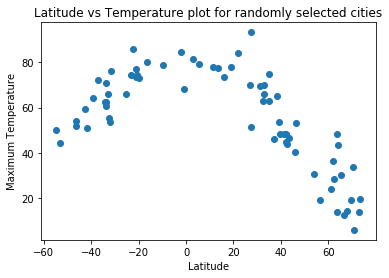

In [9]:
lat_data = city_df["Lat"]
temp_data = city_df["Max Temp"]
plt.scatter(lat_data,temp_data)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs Temperature plot for randomly selected cities")
plt.show()

## Latitude vs. Humidity Plot

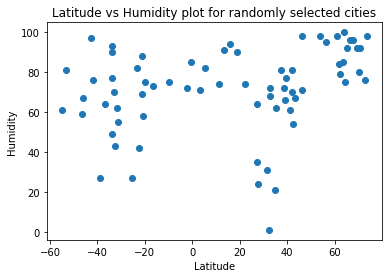

In [10]:
hum_data = city_df["Humidity"]
plt.scatter(lat_data,hum_data)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity plot for randomly selected cities")
plt.show()


## Latitude vs. Cloudiness Plot

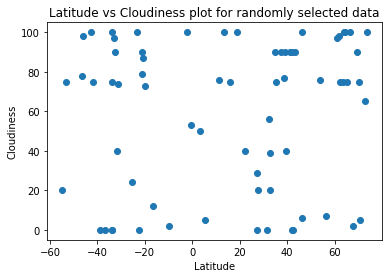

In [11]:
cloud_data = city_df["Cloudiness"]
plt.scatter(lat_data,cloud_data)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness plot for randomly selected data")
plt.show()

## Latitude vs. Wind Speed Plot

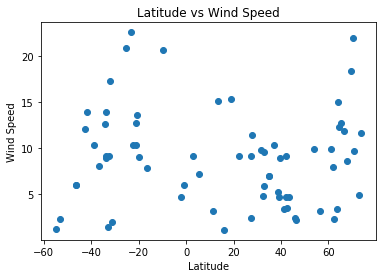

In [12]:
wind_data = city_df["Wind Speed"]
plt.scatter(lat_data,wind_data)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.show()

## Linear Regression

In [13]:
nh_weatherdf  = city_df.loc[city_df["Lat"] >= 0,:]
sh_weatherdf = city_df.loc[city_df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

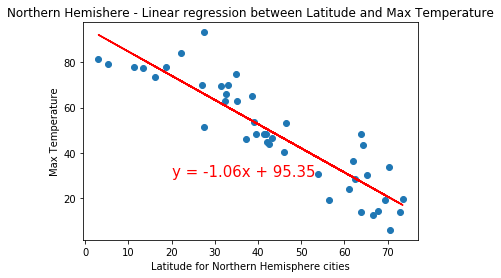

The R Squared value is : 0.814547024607143
Correlation Coefficient for Latitude and Maximum Temperature for cities in Northern Hemisphere is (-0.9025225895273441, 1.361331345955979e-16)


In [14]:
nh_lat = nh_weatherdf["Lat"]
nh_temp = nh_weatherdf["Max Temp"]
(slope_nh, intercept_nh, rvalue_nh, pvalue_nh, stderr_nh) = linregress(nh_lat, nh_temp)
regress_values_nh = nh_lat * slope_nh + intercept_nh
line_eq_nh = "y = " + str(round(slope_nh,2)) + "x + " + str(round(intercept_nh,2))
plt.scatter(nh_lat,nh_temp)
plt.plot(nh_lat,regress_values_nh,"r-")
plt.annotate(line_eq_nh,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Northern Hemisphere cities')
plt.ylabel('Max Temperature')
plt.title('Northern Hemishere - Linear regression between Latitude and Max Temperature')
plt.show()
print("The R Squared value is : "+ str(rvalue_nh ** 2))

r_nh = st.pearsonr(nh_lat,nh_temp)
print("Correlation Coefficient for Latitude and Maximum Temperature for cities in Northern Hemisphere is "+ str(r_nh))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

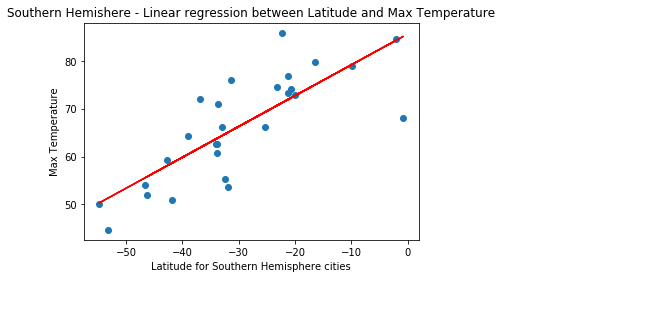

The R Squared value is : 0.6252145799468082
Correlation Coefficient for Latitude and Maximum Temperature for cities in Northern Hemisphere is (0.7907051156700633, 9.198246976438863e-07)


In [15]:
sh_lat = sh_weatherdf["Lat"]
sh_temp = sh_weatherdf["Max Temp"]
(slope_sh, intercept_sh, rvalue_sh, pvalue_sh, stderr_sh) = linregress(sh_lat, sh_temp)
regress_values_sh = sh_lat * slope_sh + intercept_sh
line_eq_sh = "y = " + str(round(slope_sh,2)) + "x + " + str(round(intercept_sh,2))
plt.scatter(sh_lat,sh_temp)
plt.plot(sh_lat,regress_values_sh,"r-")
plt.annotate(line_eq_sh,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Southern Hemisphere cities')
plt.ylabel('Max Temperature')
plt.title('Southern Hemishere - Linear regression between Latitude and Max Temperature')
plt.show()
print("The R Squared value is : "+ str(rvalue_sh ** 2))

r_sh = st.pearsonr(sh_lat,sh_temp)
print("Correlation Coefficient for Latitude and Maximum Temperature for cities in Northern Hemisphere is "+ str(r_sh))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

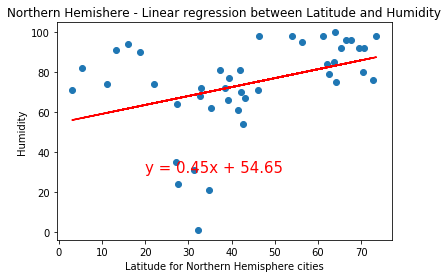

The R Squared value is : 0.15111532281079096
Correlation Coefficient for Latitude and Humidity for cities in Northern Hemisphere is (0.3887355435392949, 0.009989228732276591)


In [16]:
nh_lat = nh_weatherdf["Lat"]
nh_hum = nh_weatherdf["Humidity"]
(slope_nh_hum, intercept_nh_hum, rvalue_nh_hum, pvalue_nh_hum, stderr_nh_hum) = linregress(nh_lat, nh_hum)
regress_values_nh_hum = nh_lat * slope_nh_hum + intercept_nh_hum
line_eq_nh_hum = "y = " + str(round(slope_nh_hum,2)) + "x + " + str(round(intercept_nh_hum,2))
plt.scatter(nh_lat,nh_hum)
plt.plot(nh_lat,regress_values_nh_hum,"r-")
plt.annotate(line_eq_nh_hum,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Northern Hemisphere cities')
plt.ylabel('Humidity')
plt.title('Northern Hemishere - Linear regression between Latitude and Humidity')
plt.show()
print("The R Squared value is : "+ str(rvalue_nh_hum ** 2))

r_nh_hum = st.pearsonr(nh_lat,nh_hum)
print("Correlation Coefficient for Latitude and Humidity for cities in Northern Hemisphere is "+ str(r_nh_hum))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

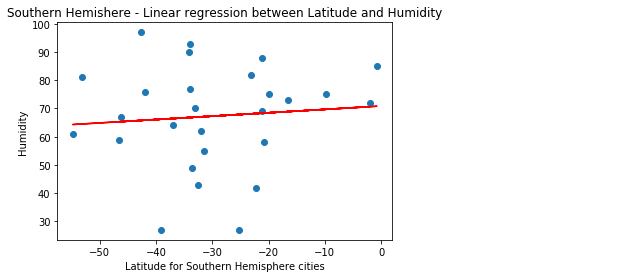

The R Squared value is : 0.00804700426958242
Correlation Coefficient for Latitude and Humidity for cities in Northern Hemisphere is (0.0897050961182386, 0.6563457166611714)


In [17]:
sh_lat = sh_weatherdf["Lat"]
sh_hum = sh_weatherdf["Humidity"]
(slope_sh_hum, intercept_sh_hum, rvalue_sh_hum, pvalue_sh_hum, stderr_sh_hum) = linregress(sh_lat, sh_hum)
regress_values_sh_hum = sh_lat * slope_sh_hum + intercept_sh_hum
line_eq_sh_hum = "y = " + str(round(slope_sh_hum,2)) + "x + " + str(round(intercept_sh_hum,2))
plt.scatter(sh_lat,sh_hum)
plt.plot(sh_lat,regress_values_sh_hum,"r-")
plt.annotate(line_eq_sh_hum,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Southern Hemisphere cities')
plt.ylabel('Humidity')
plt.title('Southern Hemishere - Linear regression between Latitude and Humidity')
plt.show()
print("The R Squared value is : "+ str(rvalue_sh_hum ** 2))

r_sh_hum = st.pearsonr(sh_lat,sh_hum)
print("Correlation Coefficient for Latitude and Humidity for cities in Northern Hemisphere is "+ str(r_sh_hum))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

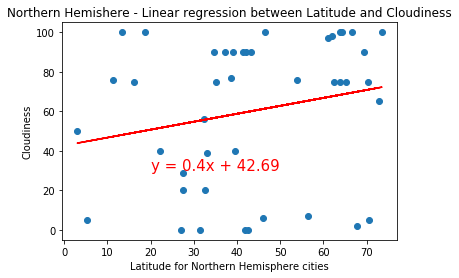

The R Squared value is : 0.04608429424214271
Correlation Coefficient for Latitude and Cloudiness for cities in Northern Hemisphere is (0.2146725279166915, 0.16684921414912962)


In [18]:
nh_lat = nh_weatherdf["Lat"]
nh_cld = nh_weatherdf["Cloudiness"]
(slope_nh_cld, intercept_nh_cld, rvalue_nh_cld, pvalue_nh_cld, stderr_nh_cld) = linregress(nh_lat, nh_cld)
regress_values_nh_cld = nh_lat * slope_nh_cld + intercept_nh_cld
line_eq_nh_cld = "y = " + str(round(slope_nh_cld,2)) + "x + " + str(round(intercept_nh_cld,2))
plt.scatter(nh_lat,nh_cld)
plt.plot(nh_lat,regress_values_nh_cld,"r-")
plt.annotate(line_eq_nh_cld,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Northern Hemisphere cities')
plt.ylabel('Cloudiness')
plt.title('Northern Hemishere - Linear regression between Latitude and Cloudiness')
plt.show()
print("The R Squared value is : "+ str(rvalue_nh_cld ** 2))

r_nh_cld = st.pearsonr(nh_lat,nh_cld)
print("Correlation Coefficient for Latitude and Cloudiness for cities in Northern Hemisphere is "+ str(r_nh_cld))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

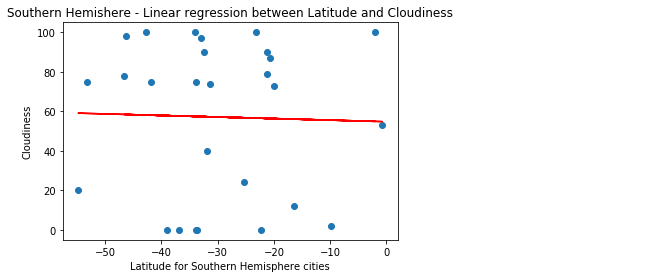

The R Squared value is : 0.0007587783609869231
Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is (-0.027545931840961983, 0.8915164928953705)


In [19]:
sh_lat = sh_weatherdf["Lat"]
sh_cld = sh_weatherdf["Cloudiness"]
(slope_sh_cld, intercept_sh_cld, rvalue_sh_cld, pvalue_sh_cld, stderr_sh_cld) = linregress(sh_lat, sh_cld)
regress_values_sh_cld = sh_lat * slope_sh_cld + intercept_sh_cld
line_eq_sh_cld = "y = " + str(round(slope_sh_cld,2)) + "x + " + str(round(intercept_sh_cld,2))
plt.scatter(sh_lat,sh_cld)
plt.plot(sh_lat,regress_values_sh_cld,"r-")
plt.annotate(line_eq_sh_cld,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Southern Hemisphere cities')
plt.ylabel('Cloudiness')
plt.title('Southern Hemishere - Linear regression between Latitude and Cloudiness')
plt.show()
print("The R Squared value is : "+ str(rvalue_sh_cld ** 2))

r_sh_cld = st.pearsonr(sh_lat,sh_cld)
print("Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is "+ str(r_sh_cld))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

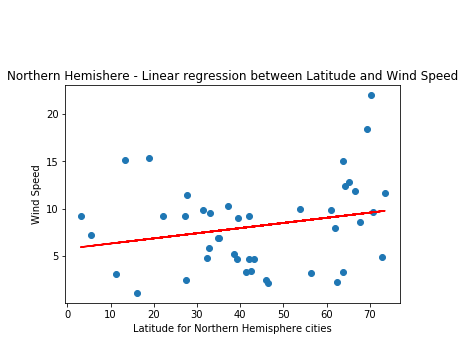

The R Squared value is : 0.05277286805212725
Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is (0.22972345995158452, 0.1383646496647765)


In [20]:
nh_lat = nh_weatherdf["Lat"]
nh_wsd = nh_weatherdf["Wind Speed"]
(slope_nh_wsd, intercept_nh_wsd, rvalue_nh_wsd, pvalue_nh_wsd, stderr_nh_wsd) = linregress(nh_lat, nh_wsd)
regress_values_nh_wsd = nh_lat * slope_nh_wsd + intercept_nh_wsd
line_eq_nh_wsd = "y = " + str(round(slope_nh_wsd,2)) + "x + " + str(round(intercept_nh_wsd,2))
plt.scatter(nh_lat,nh_wsd)
plt.plot(nh_lat,regress_values_nh_wsd,"r-")
plt.annotate(line_eq_nh_wsd,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Northern Hemisphere cities')
plt.ylabel('Wind Speed')
plt.title('Northern Hemishere - Linear regression between Latitude and Wind Speed')
plt.show()
print("The R Squared value is : "+ str(rvalue_nh_wsd ** 2))

r_nh_wsd = st.pearsonr(nh_lat,nh_wsd)
print("Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is "+ str(r_nh_wsd))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

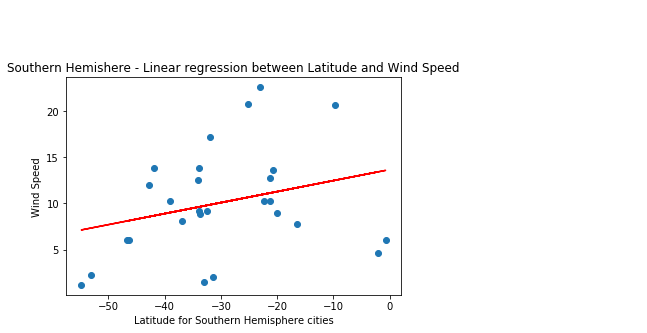

The R Squared value is : 0.0804798078916346
Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is (0.2836896330351793, 0.15157276453926757)


In [21]:
sh_lat = sh_weatherdf["Lat"]
sh_wsd = sh_weatherdf["Wind Speed"]
(slope_sh_wsd, intercept_sh_wsd, rvalue_sh_wsd, pvalue_sh_wsd, stderr_sh_wsd) = linregress(sh_lat, sh_wsd)
regress_values_sh_wsd = sh_lat * slope_sh_wsd + intercept_sh_wsd
line_eq_sh_wsd = "y = " + str(round(slope_sh_wsd,2)) + "x + " + str(round(intercept_sh_wsd,2))
plt.scatter(sh_lat,sh_wsd)
plt.plot(sh_lat,regress_values_sh_wsd,"r-")
plt.annotate(line_eq_sh_wsd,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Southern Hemisphere cities')
plt.ylabel('Wind Speed')
plt.title('Southern Hemishere - Linear regression between Latitude and Wind Speed')
plt.show()
print("The R Squared value is : "+ str(rvalue_sh_wsd ** 2))

r_sh_wsd = st.pearsonr(sh_lat,sh_wsd)
print("Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is "+ str(r_sh_wsd))